
# Introduction to Deep Learning: Final Project
### Character-Level Text Generation Inspired by Nietzsche's Beyond Good and Evil

Introduction

In the project we embark on a journey to develop a character-level text generation model inspired by Nietzsche's writing style in Beyond Good and Evil.

By harnessing the power of Long Short-Term Memory (LSTM), a type of recurrent neural network (RNN), we aim to create an artificial intelligence model that can generate text reminiscent of Nietzsche's literary voice. LSTM networks have proven to be exceptionally effective in capturing long-range dependencies in sequential data, making them an ideal choice for tasks such as text generation.

The primary objective of this project is to train an LSTM-based model using Nietzsche's Beyond Good and Evil as the training data. By analyzing the patterns, structures, and linguistic nuances in Nietzsche's writing, the model will learn to grasp the essence of his style. Subsequently, when provided with a seed text, the model will generate responses that possess similar characteristics to Nietzsche's profound and contemplative manner of expression.

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import pandas as pd
import random
import io
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Data Preprocessing: Preparing Nietzschean Text for Training

To train a character-level text generation model inspired by Friedrich Nietzsche's writings, thorough data preprocessing is essential. This code snippet plays a critical role in preparing the Nietzschean text data for the subsequent training process.

The first step involves downloading Nietzsche's works using the `keras.utils.get_file()` function, ensuring easy access to the text. By opening the file with `io.open()` and applying UTF-8 encoding, the text is loaded, and all characters are converted to lowercase to ensure consistency. Additionally, newline characters are replaced with spaces for better text display.

Once the text corpus is ready, the code calculates its length, providing insight into the total number of characters available for training. To facilitate analysis, a sorted list called chars is created, containing all unique characters found in the text. This list serves as the vocabulary for the model. Alongside this, two dictionaries, char_indices and indices_char, are constructed to establish mappings between characters and their corresponding indices, enabling efficient encoding and decoding operations during both training and text generation stages.

Next, the code segments the text into overlapping sequences of a fixed length (maxlen). These sequences act as the input-output pairs for training the model, capturing the underlying patterns in Nietzsche's writing style. The number of sequences generated is reported, giving an understanding of the scale of the training dataset.

Finally, the text sequences are encoded using one-hot encoding to represent the input and output data in a numerical format. The input sequences (sentences) are transformed into a three-dimensional numpy array (x), where each character within a sequence is one-hot encoded. Similarly, the output sequences (next_chars) are transformed into a two-dimensional numpy array (y), representing the next character the model should predict given an input sequence. This encoding process prepares the data for efficient training, ensuring that the model can comprehend the textual information and learn Nietzsche's writing patterns effectively.

In [3]:
path = keras.utils.get_file(
    "nietzsche.txt", origin="https://s3.amazonaws.com/text-datasets/nietzsche.txt"
)
with io.open(path, encoding="utf-8") as f:
    text = f.read().lower()
text = text.replace("\n", " ")  # We remove newlines chars for nicer display
print("Corpus length:", len(text))

chars = sorted(list(set(text)))
print("Total chars:", len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

# cut the text in semi-redundant sequences of maxlen characters
maxlen = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i : i + maxlen])
    next_chars.append(text[i + maxlen])
print("Number of sequences:", len(sentences))

x = np.zeros((len(sentences), maxlen, len(chars)), dtype=bool)
y = np.zeros((len(sentences), len(chars)), dtype=bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1



600901/600901 [==============================] - 0s 0us/step
Corpus length: 600893
Total chars: 56
Number of sequences: 200285


## Data Visulations
To gain insights into the text data, we create a histogram of the most common words. This visualization highlights the frequently occurring words and their respective counts. By analyzing the distribution of word frequencies, we can identify prominent words within the corpus and discern any patterns or anomalies. The histogram provides a clear visual representation of the word frequency distribution, enabling a deeper understanding of the text characteristics and significance of specific terms.

In [22]:
text

'preface   supposing that truth is a woman--what then? is there not ground for suspecting that all philosophers, in so far as they have been dogmatists, have failed to understand women--that the terrible seriousness and clumsy importunity with which they have usually paid their addresses to truth, have been unskilled and unseemly methods for winning a woman? certainly she has never allowed herself to be won; and at present every kind of dogma stands with sad and discouraged mien--if, indeed, it stands at all! for there are scoffers who maintain that it has fallen, that all dogma lies on the ground--nay more, that it is at its last gasp. but to speak seriously, there are good grounds for hoping that all dogmatizing in philosophy, whatever solemn, whatever conclusive and decided airs it has assumed, may have been only a noble puerilism and tyronism; and probably the time is at hand when it will be once and again understood what has actually sufficed for the basis of such imposing and abs

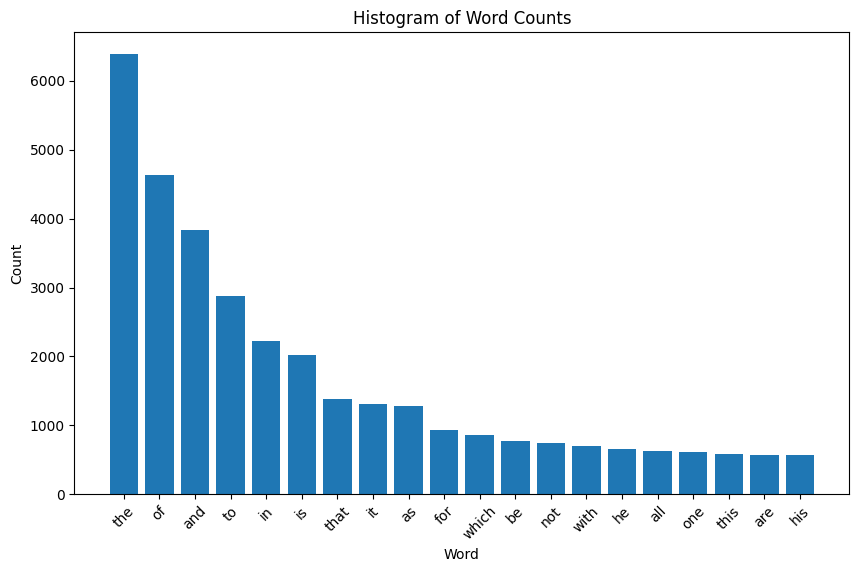

In [10]:
count_vectorizer = CountVectorizer()

# Fit and transform the text data
count_matrix = count_vectorizer.fit_transform([text])  # Wrap text in a list

# Get the word frequencies
word_frequencies = count_matrix.sum(axis=0)

# Get the word count values and corresponding words
word_counts = word_frequencies.tolist()[0]
words = count_vectorizer.get_feature_names_out()

# Create a DataFrame with word counts and words
word_count_df = pd.DataFrame({'Word': words, 'Count': word_counts})

# Sort the DataFrame by word counts in descending order
word_count_df = word_count_df.sort_values('Count', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(word_count_df['Word'][:20], word_count_df['Count'][:20])
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Histogram of Word Counts')
plt.xticks(rotation=45)
plt.show()


A Word Cloud visualization is utilized to provide a concise and visually captivating representation of the text data. The code snippet creates a WordCloud object, generates the word cloud based on the provided text, and displays it using matplotlib.

The WordCloud object is configured with parameters such as the image dimensions, maximum number of words, and background color. The generate() method is then employed to generate the word cloud representation, visually highlighting the most prominent words based on their frequency.

Through this visually appealing representation, the Word Cloud visualization facilitates the exploration and understanding of the text corpus, revealing meaningful patterns and key insights that contribute to a deeper comprehension of the textual characteristics.

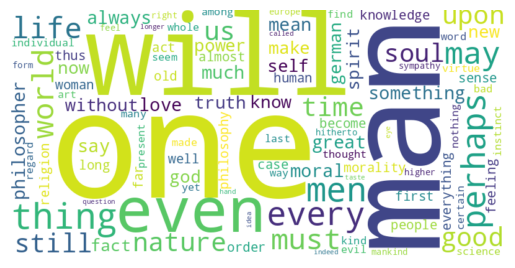

In [12]:
# Create WordCloud object
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)

# Generate the word cloud
wordcloud.generate(text)

# Display the generated word cloud using matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [17]:
# Calculate transition probabilities
def calculate_transition_probabilities(text):
    char_indices = {char: i for i, char in enumerate(set(text))}
    num_unique_chars = len(char_indices)
    transition_counts = np.zeros((num_unique_chars, num_unique_chars))

    for i in range(len(text) - 1):
        current_char = text[i]
        next_char = text[i + 1]
        current_char_index = char_indices[current_char]
        next_char_index = char_indices[next_char]
        transition_counts[current_char_index][next_char_index] += 1

    transition_probabilities = transition_counts / np.sum(transition_counts, axis=1, keepdims=True)
    return transition_probabilities, char_indices

The first heatmap generated from epoch 0 reveals a relatively disconnected pattern. This lack of connectivity can be attributed to the initial stages of training when the model is yet to capture the intricate nuances of Nietzsche's writing style. Consequently, the generated text predominantly consists of popular and frequently occurring words within that specific section of the text corpus. This tendency towards similarity may result in the repetition of common phrases or concepts, lacking the distinctive coherence associated with Nietzsche's writings.

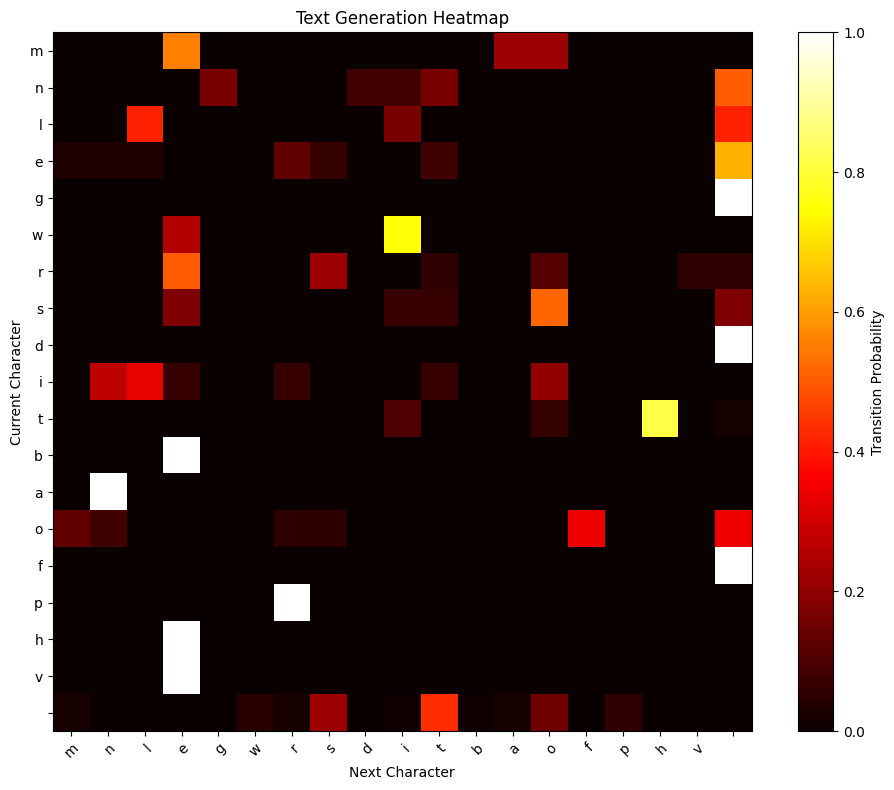

In [21]:
# Generated text from Epoch 0 Diversity 0.2
generated_text = "in the to still the remanient of the so the so the will the to still the reman of the seling of the prosention of the preserves of the somether of the seling of the prosition of the more the were of the will the will the so the so the be the so the somethers of the so the more the so the so the somethers of the to so the so in the somethers and the the somethers of the presertion of the presire a"


# Calculate transition probabilities and character indices
transition_probabilities, char_indices = calculate_transition_probabilities(generated_text)

# Create the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
heatmap = ax.imshow(transition_probabilities, cmap='hot')
ax.set_xticks(np.arange(len(char_indices)))
ax.set_yticks(np.arange(len(char_indices)))
ax.set_xticklabels(char_indices.keys())
ax.set_yticklabels(char_indices.keys())
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

cbar = plt.colorbar(heatmap)
cbar.set_label('Transition Probability')

# Show the heatmap
plt.title('Text Generation Heatmap')
plt.xlabel('Next Character')
plt.ylabel('Current Character')
plt.tight_layout()
plt.show()

However, the second heatmap derived from epoch 23 showcases a noticeable improvement in the model's performance. The increased connectivity within the heatmap indicates that the model has learned and internalized the complex writing patterns of Nietzsche to a greater extent. As a result, the generated text from this epoch demonstrates a much closer approximation to Nietzsche's writing style, capturing his unique philosophical perspectives and intellectual depth.

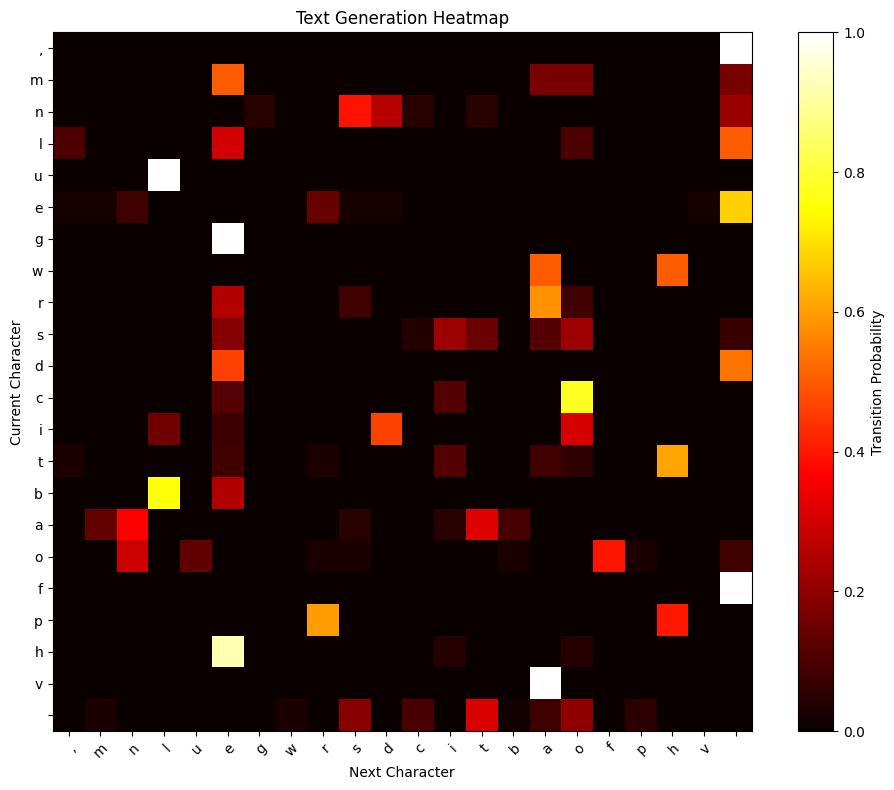

In [20]:
#Generated text from Epoch 23 Diversity 0.2
generated_text = "the soul of the stranged to be the consideration of the considerable the consideration of the philosophers and the considerable the problem of the sense, and and more prevail, and the state of man who was and the state of present, and the soul of the same of the consideration of the sense to the conscience of the consideration of the same soul of the soul of the soul of the state of the same"


# Calculate transition probabilities and character indices
transition_probabilities, char_indices = calculate_transition_probabilities(generated_text)

# Create the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
heatmap = ax.imshow(transition_probabilities, cmap='hot')
ax.set_xticks(np.arange(len(char_indices)))
ax.set_yticks(np.arange(len(char_indices)))
ax.set_xticklabels(char_indices.keys())
ax.set_yticklabels(char_indices.keys())
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

cbar = plt.colorbar(heatmap)
cbar.set_label('Transition Probability')

# Show the heatmap
plt.title('Text Generation Heatmap')
plt.xlabel('Next Character')
plt.ylabel('Current Character')
plt.tight_layout()
plt.show()

## Model Architecture
In order to generate text with a style reminiscent of Friedrich Nietzsche's writings, an LSTM-based model needs to be constructed and compiled. The following code snippet details the architecture and compilation steps for the model.

The model is defined using the keras.Sequential class, which allows for a linear stack of layers. The input shape is specified as (maxlen, len(chars)), indicating that the model expects input sequences of maxlen length, where each character is represented as a one-hot encoded vector of length len(chars). This ensures the model can effectively process the encoded text data.

The architecture incorporates an LSTM layer with 128 units. The LSTM layer is a specialized type of recurrent neural network (RNN) that excels at capturing long-range dependencies in sequential data. By utilizing 128 units, the LSTM layer can learn complex patterns and relationships within the text data, facilitating the generation of coherent and contextually rich text.

Following the LSTM layer, a dense layer is added with len(chars) units, representing the number of unique characters in the vocabulary. This layer uses the softmax activation function to produce a probability distribution over the characters. The output from this layer represents the model's predictions for the next character given a specific input sequence.

Moving on to the compilation step, the model is compiled with a categorical cross-entropy loss function, specified as "categorical_crossentropy". This loss function is commonly used in multiclass classification tasks and is suitable for generating text, where the objective is to predict the most likely next character from a set of possible characters.

An RMSprop optimizer is utilized with a learning rate of 0.01. RMSprop is an optimization algorithm that adapts the learning rate during training, which can help in achieving faster convergence and better performance for the text generation task.

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=(maxlen, len(chars))),
        layers.LSTM(128),
        layers.Dense(len(chars), activation="softmax"),
    ]
)
optimizer = keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=optimizer)


## Sampling Function: Enhancing Text Variation
The sampling function presented here plays a crucial role in generating diverse outputs inspired by Friedrich Nietzsche's writings. By applying a temperature-based transformation to the probability distribution, the function introduces controlled randomness. This promotes textual variation and enables the generation of Nietzschean-like text outputs that capture the essence of Nietzsche's profound writing style.

In [ ]:

def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype("float64")
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

## Text Generation Process: Training and Sampling
he training phase consists of multiple epochs, determined by the variable epochs. Within each epoch, the model undergoes training using the model.fit() function, where the input sequences (x) and their corresponding output labels (y) are provided. The training is performed in batches, with the batch size specified as batch_size. This progressive training approach enables the model to learn and adapt to Nietzsche's writing patterns over time, fine-tuning its internal parameters.

Upon completion of each epoch, the code proceeds to generate text outputs, offering insights into the model's progress. A seed text is randomly selected from the Nietzschean corpus, serving as the starting point for generating text. The diversity parameter, encompassing values such as 0.2, 0.5, 1.0, and 1.2, plays a vital role in controlling the level of randomness infused into the generated output.

For each diversity value, the seed text is utilized to initialize the text generation process. The model predicts the subsequent character iteratively, taking into account the preceding sequence. By employing the sample() function, which incorporates the model's probability distribution, the next character is chosen, reflecting the level of diversity specified.

Throughout the generation process, the sampled characters are concatenated to form the final generated text. The iterative loop continues for a fixed length of 400 characters, ensuring a sufficiently lengthy output that aligns with Nietzsche's writing style.

In [ ]:
epochs = 40
batch_size = 128

for epoch in range(epochs):
    model.fit(x, y, batch_size=batch_size, epochs=1)
    print()
    print("Generating text after epoch: %d" % epoch)

    start_index = random.randint(0, len(text) - maxlen - 1)
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print("...Diversity:", diversity)

        generated = ""
        sentence = text[start_index : start_index + maxlen]
        print('...Generating with seed: "' + sentence + '"')

        for i in range(400):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.0
            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]
            sentence = sentence[1:] + next_char
            generated += next_char

        print("...Generated: ", generated)
        print()

1565/1565 [==============================] - 16s 5ms/step - loss: 1.9532

Generating text after epoch: 0
...Diversity: 0.2
...Generating with seed: "t reason and instinct lead spontaneously"
...Generated:   in the to still the remanient of the so the so the will the to still the reman of the seling of the prosention of the preserves of the somether of the seling of the prosition of the more the were of the will the will the so the so the be the so the somethers of the so the more the so the so the somethers of the to so the so in the somethers and the the somethers of the presertion of the presire a

...Diversity: 0.5
...Generating with seed: "t reason and instinct lead spontaneously"
...Generated:   the more in the treat if the soul of such a differeration as the more the one in ording and man of the seling of one so art such and the presiliation. they every most of the meture the the presention and how which is it in of a condicion of is no most and the the him stard the so the to th